Firstly, I tried making a model from scratch and training it with cifar10 dataset. I trained and tuned it but i didnt understood how to get the embedding layer which has all the semantic information about the picture in vectorial form to compare the similarity score between the images. So i decided to use a 
pre trained model VG166. I loaded the dataset, then pre processed it using globalmaxpooling by converting the 3D feature map into one single vector so that 
we get a fixed length vector for embedding. VGG expects the image to be in a different dimension so i rescaled it and processed it accordingly.
Then with cosine similarity which measures the distance between the vectors in space, the farther the vector, the more different they are.

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras import layers

from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from numpy import dot


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train = x_train/255
x_test = x_test/255
x_train[0].shape

(32, 32, 3)

In [8]:
def CNN():
    model =Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',name = "embed"))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [9]:
model = CNN()

c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,epochs=30,batch_size=64,validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4048 - loss: 1.6232 - val_accuracy: 0.5110 - val_loss: 1.3684
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5471 - loss: 1.2697 - val_accuracy: 0.5644 - val_loss: 1.2272
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6009 - loss: 1.1362 - val_accuracy: 0.5995 - val_loss: 1.1321
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6349 - loss: 1.0362 - val_accuracy: 0.6383 - val_loss: 1.0295
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6638 - loss: 0.9635 - val_accuracy: 0.6388 - val_loss: 1.0288
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6830 - loss: 0.9094 - val_accuracy: 0.6711 - val_loss: 0.9542
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7001 - loss: 0.8568 - val_accuracy: 0.6765 - val_loss: 0.9372
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7207 - loss: 0.8044 - val_accuracy: 0.

In [12]:
data_A_img = x_test[:10000]
data_B_img = y_test[:10000]
data_A_label = x_test[10000:20000]
data_B_label = y_test[10000:20000]

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embed (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [16]:
model1 = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
model1.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(model1.output)
embedding_model = Model(inputs=model1.input, outputs=x)
def func1(var):
    img = image.load_img(var, target_size=(224, 224))        
    imgarr = image.img_to_array(img)                            
    imgarr = np.expand_dims(imgarr, axis=0)                  
    imgarr = preprocess_input(imgarr)                        
    return imgarr

In [18]:
pwd

'c:\\Users\\SOHAM\\ml'

In [19]:
img1_path = r"C:\Users\SOHAM\train\REAL\0000 (2).jpg"
img2_path = r"C:\Users\SOHAM\train\REAL\0001 (2).jpg"

img1 = func1(img1_path)
img2 = func1(img2_path)

In [20]:
emb1 = embedding_model.predict(img1)
emb2 = embedding_model.predict(img2)

similarity = dot(emb1[0], emb2[0]) / (norm(emb1[0]) * norm(emb2[0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [22]:
emb1[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.57905799e-02, 0.00000000e+00, 3.43697429e+00, 4.88696426e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.48393050e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.35181594e-01, 0.00000000e+00, 1.05421245e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78982073e-03, 0.00000000e+00, 0.00000000e+00, 4.54825819e-01,
       0.00000000e+00, 0.00000000e+00, 2.33579010e-01, 0.00000000e+00,
       1.36120811e-01, 0.00000000e+00, 3.30416131e+00, 0.00000000e+00,
       1.81285471e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.95247889e+00, 0.00000000e+00,
       2.94566655e+00, 0.00000000e+00, 1.17099755e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.59080589e-01, 0.00000000e+00,
       7.49658823e+00, 0.00000000e+00, 5.01444861e-02, 1.23474574e+00,
      

In [87]:
similarity

0.71067595

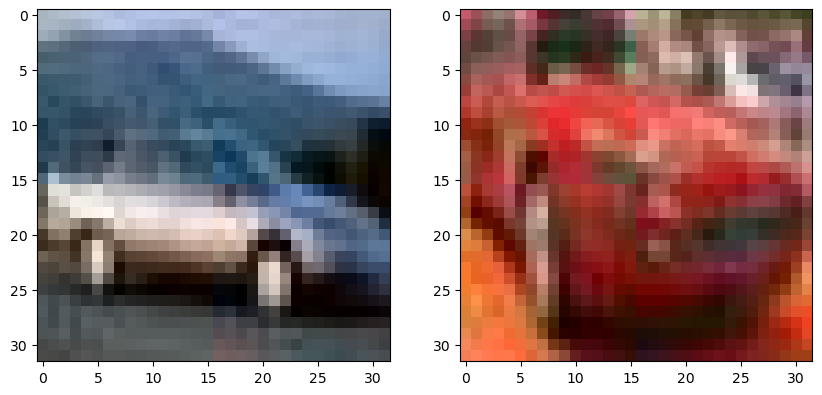

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.array(img1))
axes[1].imshow(np.array(img2))
plt.show()


In [99]:
# The similarity score for both the images is 71%